In [9]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import decomposition
from sklearn.preprocessing import scale
from matplotlib.colors import ListedColormap
%matplotlib inline

import statsmodels.api as sm
import seaborn as sns
from sklearn.cluster import KMeans

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import iqr
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans


import numpy as np
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score, normalized_mutual_info_score, silhouette_score

### 1. Data Pre-processing:

In [10]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [13]:
path9 = '/content/drive/MyDrive/Colab Notebooks/All_Clean.csv'
all_customer = pd.read_csv(path9)

all_customer = all_customer.drop(['Unnamed: 0', 'MDM ID'], axis=1)
all_customer['subscription_state'] = np.where(all_customer['subscription_state'] == "subscribed", 1, 0)
all_customer = all_customer.drop(columns=['user_sub_environment'])
all_customer = all_customer.drop(columns=['lifetime_loyalty_class'])
all_customer['Gender'] = np.where(all_customer['Gender'] == "F", 1, 0)
all_customer = all_customer.drop(columns=['Occupation'])
all_customer = all_customer.drop(columns=['Household_Size'])

all_customer['frequency'] = 1/all_customer['frequency']
all_customer['average_spending'] = all_customer['hw_revenue']/all_customer['printer_total']
all_customer = all_customer.rename(columns={"y":"Repurchased"})

all_customer.loc[all_customer["frequency"] > 100000, "frequency"] = 0


### 2. Feature Engineering (Frequency, Recency, Monetary)

In [ ]:
#### Printer Total, HW Revenue, Life_time window, Recency, Frequency
printer_total = all_customer.groupby("MDM ID").count()
printer_total = printer_total['Unnamed: 0']
printer_total = pd.DataFrame(printer_total)


hw_revenue = all_customer.groupby(["MDM ID"]).sum(['Product Price'])
hw_revenue = hw_revenue[['Product Price']]

transaction_datedmax_df99 = all_customer.groupby(["MDM ID"])["Registration_Dt"].max()
transaction_datedmin_df99 = all_customer.groupby(["MDM ID"])["Registration_Dt"].min()
life_time_window = pd.DataFrame((transaction_datedmax_df99 - transaction_datedmin_df99).dt.days)
life_time_window = life_time_window.astype(float)

lastday99 = all_customer['Registration_Dt'].max()
recency = lastday99 - transaction_datedmax_df99
recency = pd.DataFrame(recency)

frequency = printer_total['Unnamed: 0']/life_time_window['Registration_Dt']
frequency = pd.DataFrame(frequency)


subscription_state = all_customer.groupby(["MDM ID"])["subscription_state"].nth(1)
subscription_state = pd.DataFrame(subscription_state)

user_sub_environment = all_customer.groupby(["MDM ID"])["user_sub_environment"].nth(1)
user_sub_environment = pd.DataFrame(user_sub_environment)

lifetime_loyalty_class = all_customer.groupby(["MDM ID"])["lifetime_loyalty_class"].nth(1)
lifetime_loyalty_class = pd.DataFrame(lifetime_loyalty_class)

ave_cc_mo = all_customer.groupby(["MDM ID"])["ave_cc_mo"].mean()
ave_cc_mo = pd.DataFrame(ave_cc_mo)

days = all_customer.groupby(["MDM ID"])["days"].mean()
days = pd.DataFrame(days)

trade_cc = all_customer.groupby(["MDM ID"])["trade_cc"].mean()
trade_cc = pd.DataFrame(trade_cc)

hp_cc = all_customer.groupby(["MDM ID"])["hp_cc"].mean()
hp_cc = pd.DataFrame(hp_cc)


#age = all_customer.groupby(["MDM ID"])["Age"].nth(1)
#age = pd.DataFrame(age)

#Household_Income = all_customer.groupby(["MDM ID"])["Household Income"].nth(1)
#Household_Income = pd.DataFrame(Household_Income)

Gender = all_customer.groupby(["MDM ID"])["Gender"].nth(1)
Gender = pd.DataFrame(Gender)

Occupation = all_customer.groupby(["MDM ID"])["Occupation"].nth(1)
Occupation = pd.DataFrame(Occupation)

Household_Size = all_customer.groupby(["MDM ID"])["Household Size"].nth(1)
Household_Size = pd.DataFrame(Household_Size)

Electronics_Computing = all_customer.groupby(["MDM ID"])["Electronics Computing"].nth(1)
Electronics_Computing = pd.DataFrame(Electronics_Computing)

Reading_General = all_customer.groupby(["MDM ID"])["Reading General"].nth(1)
Reading_General = pd.DataFrame(Reading_General)

Crafts = all_customer.groupby(["MDM ID"])["Crafts"].nth(1)
Crafts = pd.DataFrame(Crafts)

Photography = all_customer.groupby(["MDM ID"])["Photography"].nth(1)
Photography = pd.DataFrame(Photography)

Computers = all_customer.groupby(["MDM ID"])["Computers"].nth(1)
Computers = pd.DataFrame(Computers)

Computer_Games = all_customer.groupby(["MDM ID"])["Computer Games"].nth(1)
Computer_Games = pd.DataFrame(Computer_Games)

Sports = all_customer.groupby(["MDM ID"])["Sports"].nth(1)
Sports = pd.DataFrame(Sports)

Exercise_Health = all_customer.groupby(["MDM ID"])["Exercise Health"].nth(1)
Exercise_Health = pd.DataFrame(Exercise_Health)

Movie_Music = all_customer.groupby(["MDM ID"])["Movie Music"].nth(1)
Movie_Music = pd.DataFrame(Movie_Music)

Education = all_customer.groupby(["MDM ID"])["Education"].nth(1)
Education = pd.DataFrame(Education)

### 3. Data standardization

In [20]:
std_scaler = StandardScaler()
df_scaled = std_scaler.fit_transform(all_customer)
df_scaled = pd.DataFrame(df_scaled)

In [22]:
df_scaled = df_scaled.fillna(df_scaled.mean())

### 4. K-Means Clustering Modeling

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

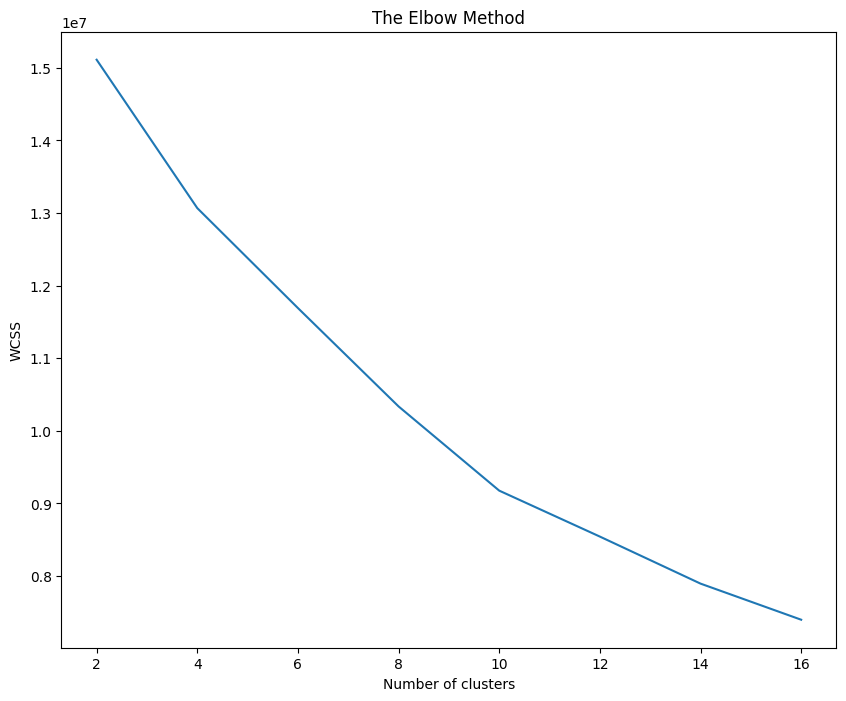

In [26]:
# find the appropriate cluster number
plt.figure(figsize=(10, 8))
from sklearn.cluster import KMeans
wcss = []
for i in (2,4,6,8,10,12,14,16):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(df_scaled)
    wcss.append(kmeans.inertia_)
plt.plot((2,4,6,8,10,12,14,16), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [24]:
model = KMeans(n_clusters = 4, random_state=42)
model.fit(df_scaled)

all_customer = all_customer.assign(ClusterLabel = model.labels_)

cluster_result = all_customer.groupby("ClusterLabel")[["Repurchased","hw_revenue","average_spending","Gender","life_time_window", "recency", "frequency","subscription_state","Education","ave_cc_mo","days","trade_cc", "hp_cc"]].mean()

cluster_result = all_customer.groupby("ClusterLabel")[["Electronics_Computing","Reading_General","Crafts", "Photography","Computers","Computer_Games","Sports","Exercise_Health","Movie_Music"]].mean()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


### 5. Clustering Results: Customer Groups

In [30]:
cluster_result = pd.DataFrame(cluster_result)

In [33]:
cluster_result['ClusterLabel'] = [1,2,3,4]

In [34]:
cluster_result

,Electronics_Computing,Reading_General,Crafts,Photography,Computers,Computer_Games,Sports,Exercise_Health,Movie_Music,ClusterLabel
ClusterLabel,,,,,,,,,,
0,0.476329,0.983905,0.892689,0.586422,0.996362,1.000000,0.965286,0.975302,0.976500,1
1,0.002424,0.017587,0.006212,0.000524,0.026014,0.000020,0.008467,0.009699,0.004428,2
2,0.405651,0.953479,0.752678,0.245385,0.973025,0.000000,0.858214,0.914127,0.750624,3
3,0.039004,0.116273,0.078909,0.020034,0.124467,0.004179,0.089397,0.098984,0.072108,4


### 6. Visualizations

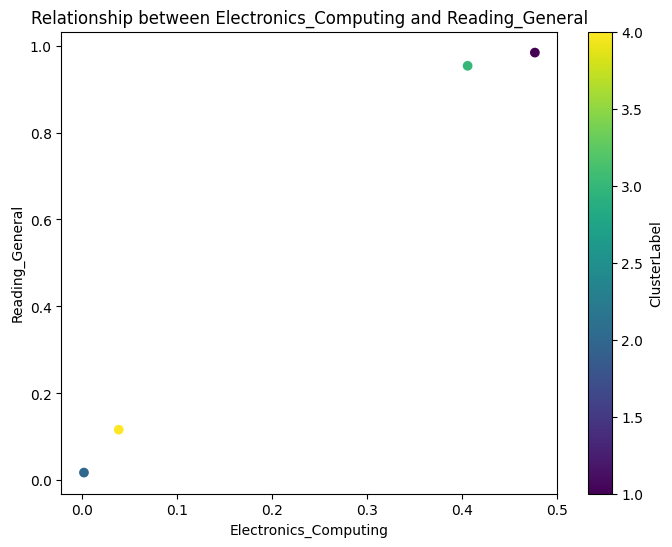

In [35]:
import pandas as pd
import matplotlib.pyplot as plt

# Plot the chart
plt.figure(figsize=(8, 6))
plt.scatter(cluster_result['Electronics_Computing'], cluster_result['Reading_General'], c=cluster_result['ClusterLabel'], cmap='viridis')
plt.xlabel('Electronics_Computing')
plt.ylabel('Reading_General')
plt.title('Relationship between Electronics_Computing and Reading_General')
plt.colorbar(label='ClusterLabel')
plt.show()

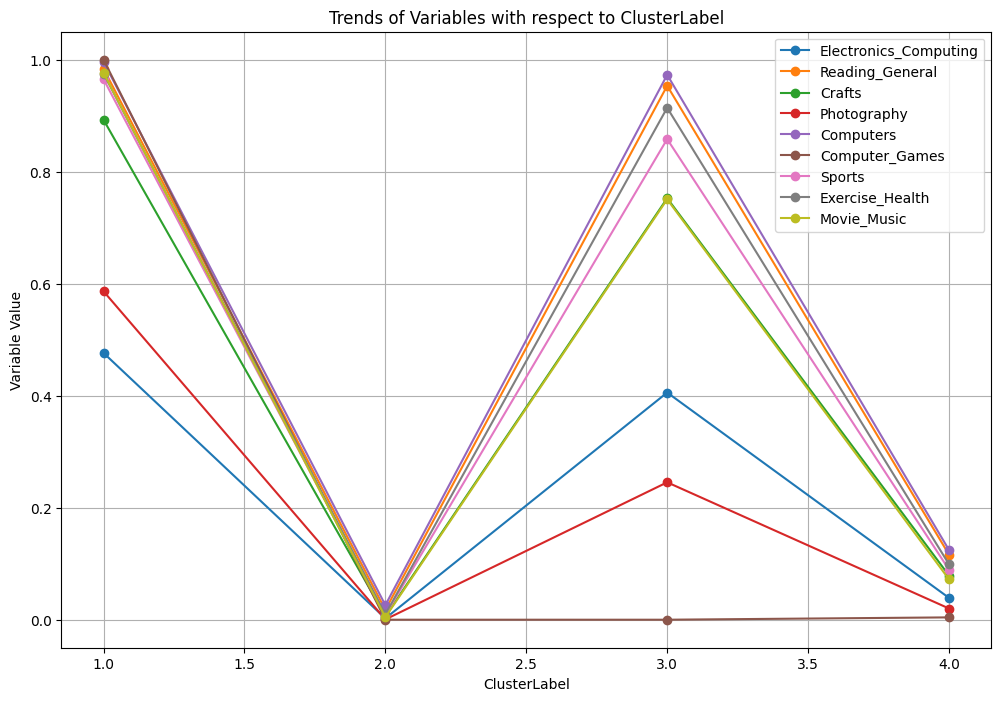

In [36]:
# Exclude the 'ClusterLabel' column for plotting trends
variables = cluster_result.columns[:-1]

# Plot the trends for all variables
plt.figure(figsize=(12, 8))

for variable in variables:
    plt.plot(cluster_result['ClusterLabel'], cluster_result[variable], marker='o', label=variable)

plt.xlabel('ClusterLabel')
plt.ylabel('Variable Value')
plt.title('Trends of Variables with respect to ClusterLabel')
plt.legend()
plt.grid(True)
plt.show()